### 1. Clean data merged data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in data
df = pd.read_csv('TikTokSpotifyMerged.csv')

# df only with values where column spotify == 1
df = df[df['spotify'] == 1]

# drop duplicates
df.drop_duplicates(subset=['track_id'], inplace=True)

# drop column tiktok
df.drop(['tiktok'], axis=1, inplace=True)

print(df.shape)
# print(df.tail(5))
df.info()
# print(df.shape)
#df.drop(['uri', 'track', 'artist'], axis=1, inplace=True) --> TO BE DECIDE


(40560, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 0 to 40559
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           40560 non-null  object 
 1   time_signature     40560 non-null  float64
 2   chorus_hit         40560 non-null  float64
 3   sections           40560 non-null  float64
 4   target             40560 non-null  float64
 5   popularity         312 non-null    float64
 6   sm_target          40560 non-null  float64
 7   spotify            40560 non-null  int64  
 8   track              40560 non-null  object 
 9   artist             40560 non-null  object 
 10  duration_ms        40560 non-null  float64
 11  danceability       40560 non-null  float64
 12  energy             40560 non-null  float64
 13  key                40560 non-null  object 
 14  loudness           40560 non-null  float64
 15  mode               40560 non-null  object 
 16  speechines

In [91]:
#drop duplicates and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.shape)

#print top two rows to check
df.head(2)

(312, 25)


,track_id,time_signature,chorus_hit,sections,target,popularity,sm_target,tiktok,spotify,track,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,era,main_parent_genre
11806,0ofHAoxe9vBkTCp2UQIavz,4.0,32.80048,12.0,1.0,85.0,1.0,1,1,Dreams,...,-9.744,major,0.0276,0.0644,0.00428,0.1280,0.789,120.151,70s,Rock
12726,0YveezON7jpiaHA8fnUHxN,4.0,15.74866,16.0,1.0,65.0,1.0,1,1,Roundabout,...,-9.453,minor,0.0687,0.0682,0.00770,0.0758,0.391,132.889,70s,Rock


### 2. Visualize dataset

1.0    306
0.0      6
Name: target, dtype: int64


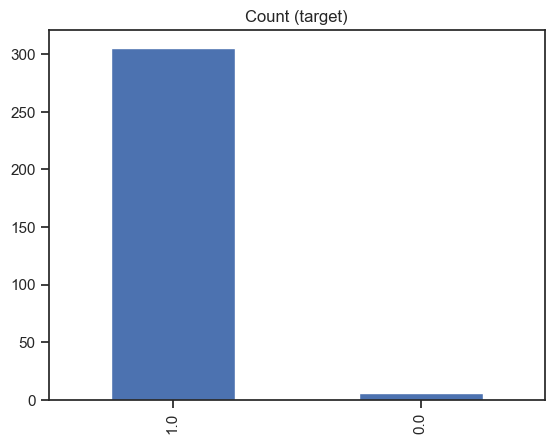

In [92]:
# count values of target variable called target of df
print(df['target'].value_counts())

# histogram of target variable
df['target'].value_counts().plot(kind='bar', title='Count (target)');
plt.show()


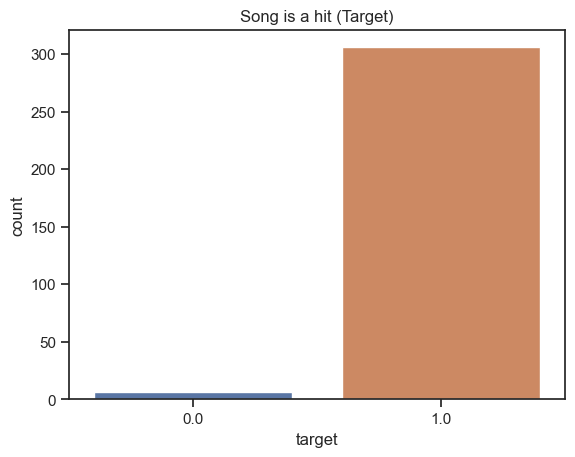

In [93]:
# Visualize Hit/Flop counts
sns.countplot(x='target',data=df)
plt.title('Song is a hit (Target)')
plt.show()

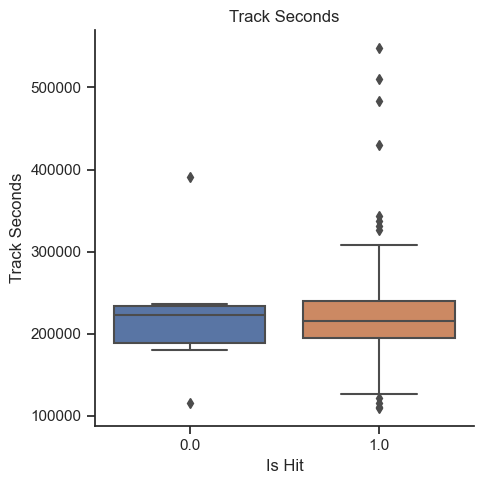

In [94]:
#visualize track seconds for hit and flop
sns.color_palette("light:b", as_cmap=True)
sns.catplot(data=df,x='target',y='duration_ms',kind='box')
plt.title('Track Seconds')
plt.xlabel('Is Hit')
plt.ylabel('Track Seconds')
plt.tight_layout()
plt.show()

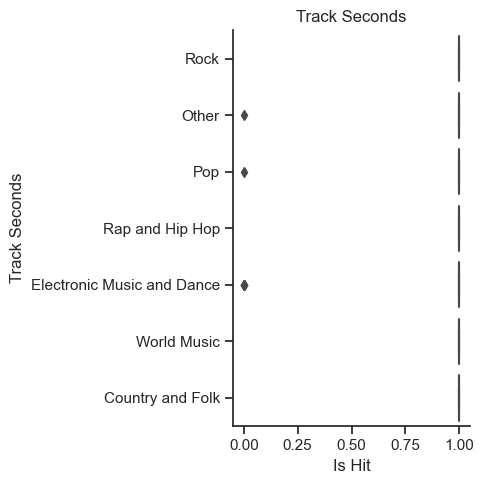

In [95]:
# visualize track seconds and genre depending on hit and flop
sns.color_palette("light:b", as_cmap=True)
sns.catplot(data=df,x='target',y='main_parent_genre',kind='box')
plt.title('Track Seconds')
plt.xlabel('Is Hit')
plt.ylabel('Track Seconds')
plt.tight_layout()
plt.show()

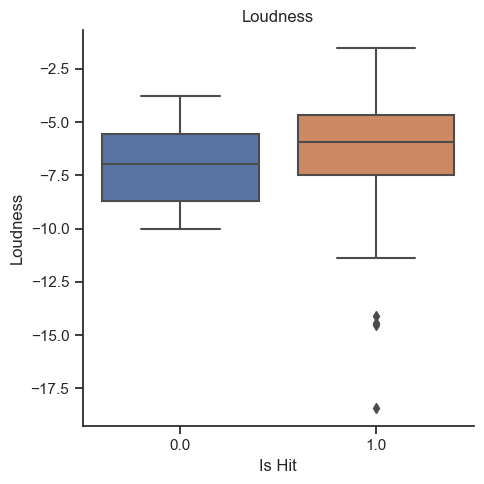

In [96]:
# plot loudness for hit and flop
sns.color_palette("light:b", as_cmap=True)
sns.catplot(data=df,x='target',y='loudness',kind='box')
plt.title('Loudness')
plt.xlabel('Is Hit')
plt.ylabel('Loudness')
plt.tight_layout()
plt.show()

### 3. Dealing with genre

In [97]:
# main_parent_genre into numerical cateogrical values
df['main_parent_genre'] = df['main_parent_genre'].astype('category')
df['main_parent_genre'] = df['main_parent_genre'].cat.codes
df['main_parent_genre'].value_counts()

df.head(2)

,track_id,time_signature,chorus_hit,sections,target,popularity,sm_target,tiktok,spotify,track,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,era,main_parent_genre
11806,0ofHAoxe9vBkTCp2UQIavz,4.0,32.80048,12.0,1.0,85.0,1.0,1,1,Dreams,...,-9.744,major,0.0276,0.0644,0.00428,0.1280,0.789,120.151,70s,5
12726,0YveezON7jpiaHA8fnUHxN,4.0,15.74866,16.0,1.0,65.0,1.0,1,1,Roundabout,...,-9.453,minor,0.0687,0.0682,0.00770,0.0758,0.391,132.889,70s,5


In [98]:
feathits=pd.DataFrame()

#df with only target value == 1
feathits = df.loc[df['target'] == 1]
feathits = feathits[['acousticness',   'instrumentalness', 'tempo', 'speechiness', 'valence','energy','liveness','danceability','loudness', 'duration_ms']]# ,'track_seconds','loudness']]
feathits['loudness'] = abs(feathits['loudness'])


featnonhits=pd.DataFrame()
featnonhits = df.loc[df['target'] == 0]
featnonhits = featnonhits[['acousticness',   'instrumentalness', 'tempo', 'speechiness', 'valence','energy','liveness','danceability','duration_ms', 'loudness']]# ,'track_seconds','loudness']]
featnonhits['loudness'] = abs(featnonhits['loudness'])

# convert duration_ms into seconds
feathits['duration_ms'] = feathits['duration_ms']/1000
featnonhits['duration_ms'] = featnonhits['duration_ms']/1000

#scale duration_ms to 0-1 value
feathits['duration_ms'] = feathits['duration_ms']/feathits['duration_ms'].max()
featnonhits['duration_ms'] = featnonhits['duration_ms']/featnonhits['duration_ms'].max()


# convert loudness into positive values
feathits['loudness'] = abs(feathits['loudness'])
featnonhits['loudness'] = abs(featnonhits['loudness'])

# scale loudness to 0-1 value
feathits['loudness'] = feathits['loudness']/feathits['loudness'].max()
featnonhits['loudness'] = featnonhits['loudness']/featnonhits['loudness'].max()

# scale tempo to 0-1 value
feathits['tempo'] = feathits['tempo']/feathits['tempo'].max()
featnonhits['tempo'] = featnonhits['tempo']/featnonhits['tempo'].max()

feathits.describe

<bound method NDFrame.describe of        acousticness  instrumentalness     tempo  speechiness  valence  energy  \
11806        0.0644          0.004280  0.589233       0.0276   0.7890   0.492   
12726        0.0682          0.007700  0.651701       0.0687   0.3910   0.761   
13964        0.1720          0.000280  0.526617       0.0473   0.9570   0.804   
16834        0.5760          0.060900  0.469671       0.0803   0.6240   0.488   
18914        0.1120          0.329000  0.539328       0.1620   0.7560   0.528   
...             ...               ...       ...          ...      ...     ...   
40403        0.0282          0.710000  0.495476       0.0859   0.7280   0.932   
40444        0.2910          0.000000  0.701639       0.1340   0.7580   0.690   
40485        0.2970          0.000009  0.667159       0.0705   0.5330   0.488   
40507        0.5880          0.000000  0.431713       0.3100   0.0727   0.353   
40553        0.0495          0.017700  0.608368       0.0336   0.3980   0.8

/var/folders/3h/r2hbd12s1r9ccvfmt_h9r3pm0000gn/T/ipykernel_1313/2150214264.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap("Set2", len(feathits.index))


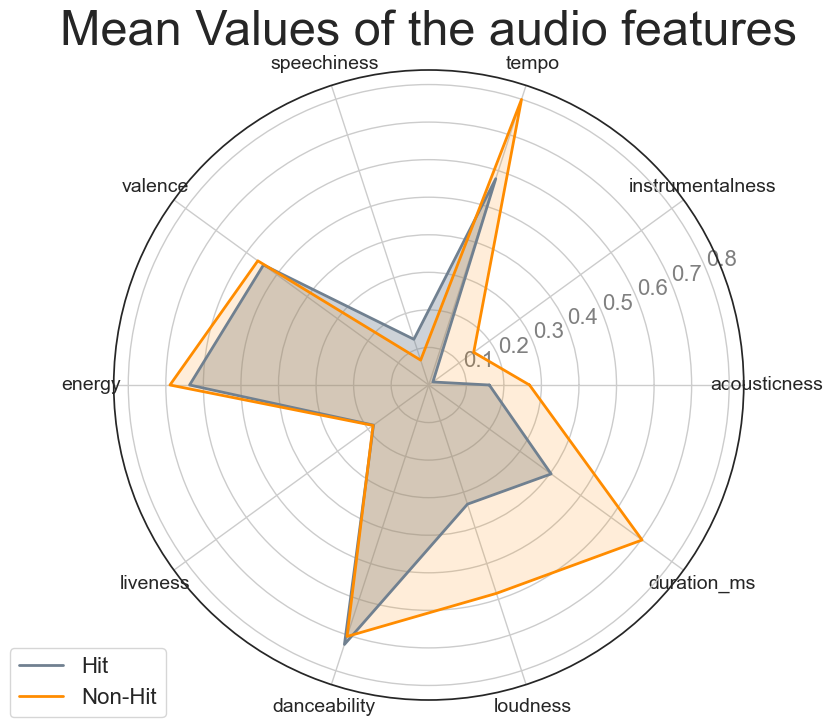

In [99]:
#STILL HAVE TO ADD DURATION_MS AND LOUDNESS

import math 


# plot size
#fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(feathits.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value = list(feathits.mean())
value2 = list(featnonhits.mean())

# # tempo - scaled
# value[2] = value[2]/220
# value2[2] = value2[2]/220

# # #scale loudness from value and value2
# # value[9] = value[9]/25
# # value2[9] = value2[9]/25

# #scale duration_ms from value and value2
# value[8] = value[8]/40000
# value2[8] = value2[8]/40000


# #speech - scaled
# value[3] = value[3]*1.5
# value2[3] = value2[3]*1.5

# # inst - scaled
# value[1] = value[1]*1.5
# value2[1] = value2[1]*1.5

# # loudness - scaled
# value[8] = value[8]/25
# value2[8] = value2[8]/25


# # # time - scaled --> to be scaled
# value[9] = value[9]/4000
# value2[9] = value2[9]/4000


# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
value2+=value2[:1]

# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)

#plot 1 hits
ax.plot(angles, value,  linewidth=2, label = "Hit", color= 'slategray')
ax.fill(angles, value, alpha=0.35, facecolor='slategray')

#plot 2 non-hits
ax.plot(angles, value2, linewidth=2, label = "Non-Hit", color = 'darkorange')
ax.fill(angles, value2, alpha=0.15, facecolor='darkorange' )
#ax.set_title('Mean Values of the audio features')
ax.grid(True)

# plt.polar(angles, value,label='hit')
# plt.fill(angles,value,alpha=0.3)

# plt.polar(angles, value2,label='non-hit',color='m')
# plt.fill(angles,value2,alpha=0.3,facecolor='m')

# plt.title('Discovery Weekly Songs Audio Features', size=35)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1),fontsize=16)
# Title 
plt.title('Mean Values of the audio features', size=35)

plt.xticks(angles[:-1],categories, size=14)
plt.yticks(color='grey',size=16)

# Create a color palette:
plt.cm.get_cmap("Set2", len(feathits.index))
plt.show()

#save as png
fig.savefig('mean-features-hits.png')

In [100]:
# define key_mapping dictionary
key_mapping = {
    0: 'C',
    1: 'C# / Db',
    2: 'D',
    3: 'D# / Eb',
    4: 'E',
    5: 'F',
    6: 'F# / Gb',
    7: 'G',
    8: 'G# / Ab',
    9: 'A',
    10: 'A# / Bb',
    11: 'B'
}

# use dictionary to replace numerical values with string values
df['key'] = df['key'].replace(key_mapping)


In [101]:
# define mode_mapping dictionary
mode_mapping = {0: 'minor', 1: 'major'}

# use dictionary to replace numerical values with string values
df['mode'] = df['mode'].replace(mode_mapping)


# Formatting spotify 


df['track_id'] = df['track_id'].str.replace('spotify:track:', '')

# Umbenenen der Splate uri in track_id
df.rename(columns={'track_id': 'track_id'}, inplace=True)


# save df as csv
df.to_csv('Spotify Data/data-clean.csv', index=False)